In [9]:
import tensorflow as tf 
from tensorflow  import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D,Activation,BatchNormalization, Dense,Dropout,MaxPooling2D,Flatten

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print("train shape : ",x_train.shape,'test shape : ',x_test.shape)

train shape :  (60000, 28, 28) test shape :  (10000, 28, 28)


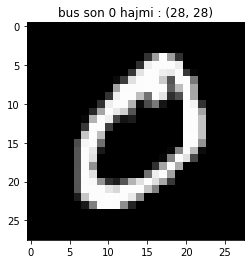

In [12]:
x = random.randint(1,10)
plt.title(f"bus son {y_train[x]} hajmi : {x_train[x].shape}")
plt.imshow(x_train[x],cmap='gray')
plt.show()

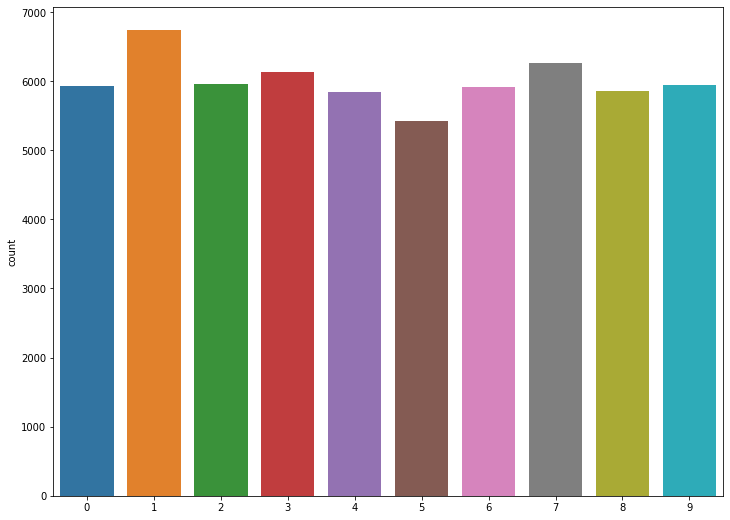

In [13]:
plt.figure(figsize=(12,9))
sns.countplot(x=y_train)
plt.show()

In [15]:
model = keras.Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(32,(5,5),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()),

model.add(Conv2D(256,(3,3),padding='Same',activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()),

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [17]:
epochs=10
batch_size = 64
op=Adam(learning_rate=0.001)
model.compile(optimizer=op,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,validation_data=(x_test,y_test),epochs=epochs )

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0520 - accuracy: 0.9861 - val_loss: 0.0635 - val_accuracy: 0.9843
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0381 - accuracy: 0.9898 - val_loss: 0.0505 - val_accuracy: 0.9873
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0299 - accuracy: 0.9918 - val_loss: 0.0296 - val_accuracy: 0.9926
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.0383 - val_accuracy: 0.9903
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.0296 - val_accuracy: 0.9931 0.0230 - accuracy: 
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0212 - accuracy: 0.9944 - val_loss: 0.0392 - val_accuracy: 0.9913
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0198 - accuracy: 0.9949 - val_loss: 0.0

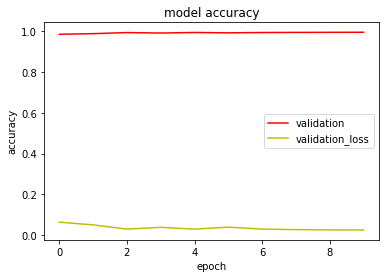

In [22]:
def plotting(hist):
    plt.plot(hist.history["val_accuracy"],'r')
    plt.plot(hist.history["val_loss"],'y')
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["validation","validation_loss"], loc="best")
    plt.show()
plotting(history)

In [26]:
evaluation = model.evaluate(x_test,y_test)
print(f"Our model accuracy is ~ {np.round(evaluation[1]*100)} %")

313/313 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.99 - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9942
Our model accuracy is ~ 99.0 %


In [27]:
model.save('mnist.model',save_format='h5')